## Image Formation, Image Processing, Image Filtering (100pts)
<em>Part of this lab is based on that from Dr. Ordonez from University of Virginia</em><br/><br/>

In this lab we will apply our knowledge in the lectures on Image Enhancement through a series of excercises focused on practical skills to build more complex applications.

### 1. Image Processing: Enhancing an Image to Make it Look Better (20pts).

In this section we will write functions to augment or reduce the brightness of an image and create a vignette effect. First, code below is provided to load an RGB image into a numpy array with 3 dimensions.

Image height:  416  width:  600


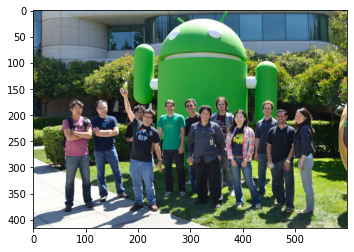

In [2]:
from PIL import Image
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

img_url = 'https://drive.google.com/uc?export=view&id=11ckrrCVnKq8oD0ATWRddwfR0308r3bpw'
#img = sp.misc.imread(urlopen(img_url), mode = 'RGB')
img = Image.open(urlopen(img_url))

# Show the image size.
print('Image height: ', img.height,' width: ',img.width)

# Plot the image.
def display_image(img):
  plt.figure()
  plt.imshow(img)
  plt.grid(False)
  plt.show()
  
display_image(img)

**1.1** Enhance the brightness of the above image so that brightness increases by a factor of 2. We are including below what the ouptut image should look like if you completed this step correctly. [Hint: this involves just scaling each pixel intensity in all channels by 2, but the img array is a uint8 type array and we should avoid overflows]  

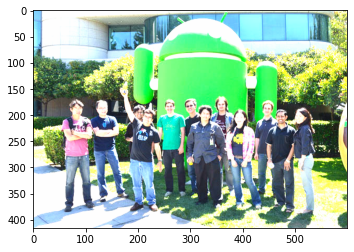

In [3]:
# convert img to numpy array
img_array = np.array(img)

# clip the pixel color values to half of uint8 max before scaling by 2 and then 
# scale each channel by 2
bright_image = np.clip(img_array,0,127)*2;

display_image(bright_image)

**1.2** We are going to implement here a vignette effect similar to the one on Instagram when you go to Edit -> Vignette. The basic idea is to make things on the boundary of the image darker and leave the pixels near the center of the image almost unchanged. We are providing below an output of what the resulting image should look like.  

In [4]:
import math

# Your code goes here.

#display_image(vignette_image)

**Final comments:** If you finished this section. Would your vignette implementation work in realtime? e.g. for real-time videoconferencing? This needs a really fast implementation. If you used for loops in any of your implementations, chances are that your implementation is not the fastest, but still acceptable for the purposes of this assignment. Also, for the vignette effect you could also allow the user to control the intensity of the effect, how would one implement that?

### 2. Image Filtering: Convolving Images (30pts).
Here we will experiment with image filtering through the convolution operator. These are operations where your output depends on a neighborhood of pixels as opposed to one-to-one pixel mapping eas we did in the previous section. We will use the same image as before but now will be working on grayscale.

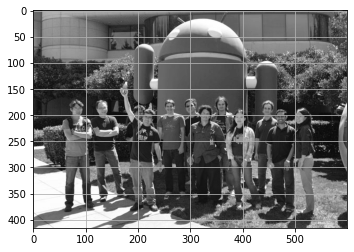

In [90]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

# Try maybe downloading the image in case the CS webserver goes down.
img_url = 'https://drive.google.com/uc?export=view&id=11ckrrCVnKq8oD0ATWRddwfR0308r3bpw'
#img = sp.misc.imread(urlopen(img_url), mode = 'RGB')
img = np.asarray(Image.open(urlopen(img_url)))

# Converting image to grayscale.
img = img.astype('float')
img = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3.0

# Plot the image.
def display_image(img):
  plt.figure()
  plt.gray()
  plt.imshow(img)
  plt.grid('off')
  plt.show()

display_image(img)

**2.1** Implement a Gaussian Blur of this image using a square neighborhood of $15\times15$ pixels with $\mu=(0, 0)$ and $\sigma=0.8$. 
Assume a symmetric 2D Gaussian distribution: e.g. $$G(x,y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$.  
Note: Feel free to use the scipy.signal.convolve2d function or implement your own, but no other external function or library will be allowed here aside from numpy, math, and matplotlib. Again, desired result is included here so you can check if your implementation is correct. Hint: Your kernel matrix has to be symmetric. 

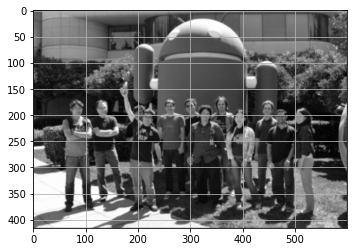

In [96]:
import numpy as np
import math
from scipy import signal

# filter parameters
size = 15
sigma = 0.8

# calculate filter kernel
x,y = np.mgrid[-(size//2):(size//2)+1, -(size//2):(size//2)+1]
g = (1/(2*np.pi*(sigma**2)))*np.exp(-((x**2) + (y**2))/(2*(sigma**2)))

# convolve image
blurred_image = signal.convolve2d(img,g,mode='same')

display_image(blurred_image)

Comments: What happens if $\sigma$ is larger? Does this make the image more blurry or less blurry? Why?

**2.2** Extend your code into to implement a bilateral filter to include the intensity term $$\frac{1}{2\pi\beta^2}e^{-\frac{(f(s,r)-f(x,y))^2}{2\beta^2}}$$ Find the $\beta$ that you believe to have the best tradeoff.  

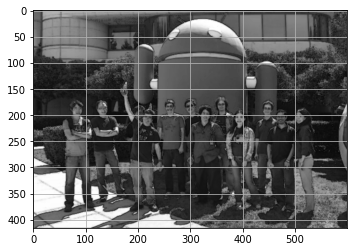

In [107]:
# Your code goes here.

# parameters
size = 15
sigma = 0.8
beta = 16

# pre-calculate some constants
two_sigma_2 = 2*sigma**2
two_beta_2 = 2*beta**2

# pre-calculate scaling constant 
k = 1/np.square(2*np.pi*sigma*beta)

# pre-calculate neighborhood indexes
x,y = np.mgrid[-(size//2):(size//2)+1,-(size//2):(size//2)+1]
img_x_idx,img_y_idx = np.mgrid[0:size,0:size]

# function to calculate the gaussian exponent part. note that the two exponents 
# (spatial and intensity) are combined together
def gaussian_exp(x, y, intensity_diff):
  a = ((x**2) + (y**2))/two_sigma_2
  b = (intensity_diff**2)/two_beta_2
  g = np.exp(-a-b)
  return g

# instantiate empty array for storing the filter output
img_filtered = np.zeros(img.shape)

# add black bars around image
img_with_bars = np.zeros((img.shape[0]+size,img.shape[1]+size))
img_with_bars[size//2:-size//2,size//2:-size//2] = img

# filter by raster scanning through image
it = np.nditer(img, flags=['multi_index'])
for pixel in it:
  # look at the pixel neighborhood
  neighbors = img_with_bars[it.multi_index[0]+img_x_idx,it.multi_index[1]+img_y_idx]

  # calculate the weights
  g = k*gaussian_exp(x, y, neighbors-pixel)

  # apply the weights, add weighted elements, and store the result
  img_filtered[it.multi_index] = np.sum(g*neighbors)

display_image(img_filtered)


**2.3** Here we will display the spatial derivatives (gradients) of the image in the x-axis direction and the y-axis direction by showing the resultant magnitude between the two. Display as an image the magnitude of the gradients at each pixel location. Use the second order Sobel operators studied in class. Note: Feel free to use the scipy.signal.convolve2d function or implement your own, but no other external function or library will be allowed here aside from numpy, math, and matplotlib. Again, desired result is included here so you can check if your implementation is correct. 

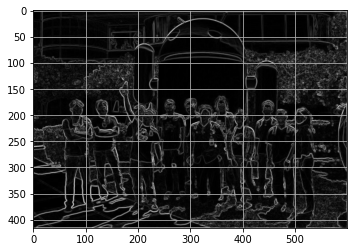

In [8]:
# Your code goes here.

# sobel filter kernels
G_x = np.array([
                [1,0,-1],
                [2,0,-2],
                [1,0,-1]
])

G_y = np.array([
                [1,2,1],
                [0,0,0],
                [-1,-2,-1],
])

# filter grayscale image in x direction
grad_x = sp.signal.convolve2d(img, G_x, mode='same')

# filter grayscale image in y direction
grad_y = sp.signal.convolve2d(img, G_y, mode='same')

# calculate gradient magnitude
magnitude_map = np.sqrt(grad_x*grad_x + grad_y*grad_y)

display_image(magnitude_map)

**2.4** Use the above output to emphasize the boundaries of the objects in the original grayscale image. Depending on how you do it this will look more or less different so I am not going to include a sample output here, but be creative and make the boundaries be highlighted. 

7.78491872306147
559.2060894020491


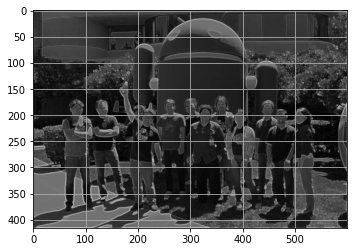

In [9]:
# Your code goes here.

# emphasis parameter
k = 0.3

# emphasize the edges in the image by scaling the gradient magnitude and then 
# adding it to grayscale image
output_image = img + k*magnitude_map

print(np.amin(output_image))
print(np.amax(output_image))

display_image(output_image)

**Final Comments:** Any of the filtering transformations in this section can be applied to color images. We can just apply the transformation to each channel individually. Try some of your implemented filters in the original RGB input using this approach. Feel free to experiment and create new filters of your own.

### 3. Exact Histogram Equalization (30pts).
Implement a function `exactHistEq(im)` for a grayscale image `im` such that the histogram of the output image is EXACTLY uniform. Test your algorithm by showing the before and after histogram. You can assume that the order of pixel intensities can be resolved by considering neighborhoods no larger than 5x5. You are free to utilize codes found on the web with proper reference and explain how you modify them to suit your need.

In [10]:
# Your code goes here.

## 4. Color Segmentation (20pts)

In lecture, we discussed the idea of using color as a visual cue to identify objects in an image. In my lab, I have a yellow sphere that is used for calibration and one of my experiments has a need to segment out the sphere from the background. The algorithm needs to be robust against variation in illumination, background scene, and imperfections on the sphere surface. As there are other calibration objects with different shapes, the goal is to develop the segmentation based purely on color. Test your algorithm with the following three images. 
![sphere 1](https://drive.google.com/uc?export=view&id=1vYWpzSzUuoCyC6SeNYjmd8ew3SaLeKDY)
![sphere 2](https://drive.google.com/uc?export=view&id=1p_VaPDpXE0n3NuRIdb41RJCejZd98iC4)
![sphere 3](https://drive.google.com/uc?export=view&id=1qqeb16lGb_rr_fGJqXz9aTBIbZwJJf6l)


Original images:


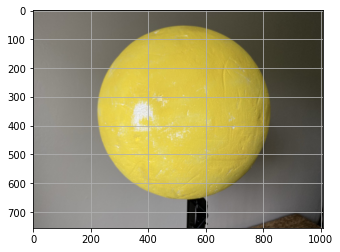

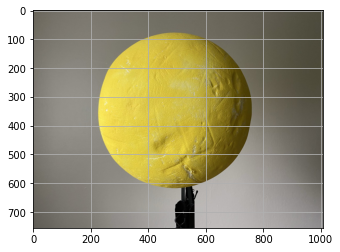

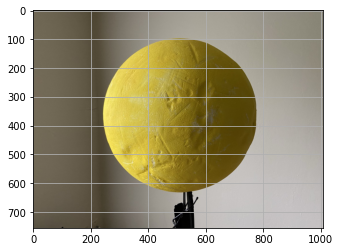

Segmented images:


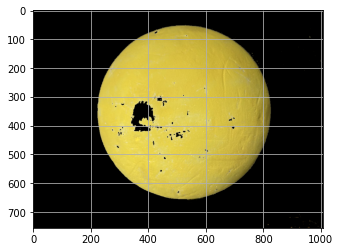

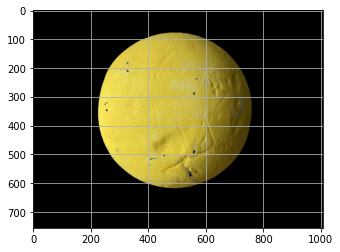

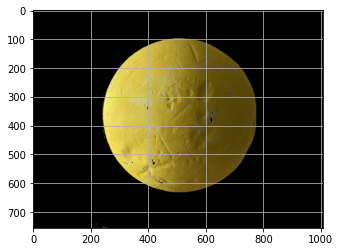

In [11]:
# Your code goes here

# read in the images
img1_url = 'https://drive.google.com/uc?export=view&id=1vYWpzSzUuoCyC6SeNYjmd8ew3SaLeKDY'
img2_url = 'https://drive.google.com/uc?export=view&id=1p_VaPDpXE0n3NuRIdb41RJCejZd98iC4'
img3_url = 'https://drive.google.com/uc?export=view&id=1qqeb16lGb_rr_fGJqXz9aTBIbZwJJf6l'

img1 = np.asarray(Image.open(urlopen(img1_url)))
img2 = np.asarray(Image.open(urlopen(img2_url)))
img3 = np.asarray(Image.open(urlopen(img3_url)))

# display original images
print('Original images:')
display_image(img1)
display_image(img2)
display_image(img3)

# function to convert RGB values to HSI values
def rgb_to_hsi(rgb_img):
  # scale RGB values to [0,1] range
  r = rgb_img[:,:,0]/255
  g = rgb_img[:,:,1]/255
  b = rgb_img[:,:,2]/255

  # convert to hue
  num = 0.5*((r-g) + (r-b))
  den = np.sqrt((r-g)*(r-g) + (r-b)*(g-b))
  hue = np.arccos(num/(den + np.finfo(float).eps))
  hue[b > g] = 2*np.pi - hue[b > g]
  hue = hue/(2*np.pi)

  # convert to saturation
  den = r+g+b
  den[den == 0] = np.finfo(float).eps
  saturation = 1 - (3/den)*np.minimum(r,np.minimum(g,b))

  # convert to intensity
  intensity = (1/3)*(r+g+b)

  return hue, saturation, intensity

# function to segment image based on color hue range and saturation threshold
def segment_color(rbg_img, hue_min, hue_max, sat_thresh):
  # convert rgb to hsi
  img_hue,img_saturation,img_intensity = rgb_to_hsi(rbg_img)

  # find where the hue and saturation are within the desired HSI color subpace
  color_idx = np.where((img_hue>hue_min) & (img_hue<hue_max) & (img_saturation>sat_thresh));

  # extract the desired color pixels
  img_color = np.zeros(rbg_img.shape, dtype='uint8')
  img_color[color_idx[0],color_idx[1],0] = rbg_img[color_idx[0],color_idx[1],0]
  img_color[color_idx[0],color_idx[1],1] = rbg_img[color_idx[0],color_idx[1],1]
  img_color[color_idx[0],color_idx[1],2] = rbg_img[color_idx[0],color_idx[1],2]

  return img_color

# desired color parameters
HUE_MIN = 0.1
HUE_MAX = 0.16
SAT_THRESH = 0.25

# segment 'yellow' color from image
img1_yellow = segment_color(img1, HUE_MIN, HUE_MAX, SAT_THRESH)
img2_yellow = segment_color(img2, HUE_MIN, HUE_MAX, SAT_THRESH)
img3_yellow = segment_color(img3, HUE_MIN, HUE_MAX, SAT_THRESH)

# dispaly segmented images
print('Segmented images:')
display_image(img1_yellow)
display_image(img2_yellow)
display_image(img3_yellow)
